In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('WASSA23_essay_level_with_labels_train.csv')
df.head(3)

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,1,Hope/Sadness
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,5.5,4.5,3.429,2.857,2.857,2.714,1,train,2,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,6.75,7.0,4.643,2.0715,4.143,4.643,1,train,4,Sadness


In [19]:
scaler = StandardScaler()
df["zempathy"] = scaler.fit_transform(df["empathy"].values.reshape(-1, 1))
scaler = StandardScaler()
df["zdistress"] = scaler.fit_transform(df["distress"].values.reshape(-1, 1))

<AxesSubplot:>

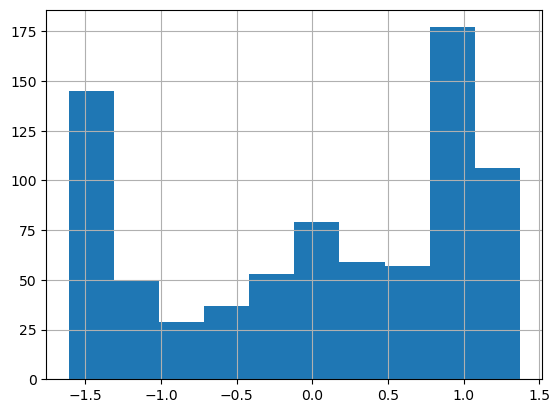

In [22]:
df["zempathy"].hist()

In [21]:
df["zempathy"].median(), df["zdistress"].median()

(0.21196026333869855, 0.04506503654123517)

In [23]:
# create cempathy from the zempathy by the median split with two classes of y and n for high and low empathy respectively
df["cempathy"] = df["zempathy"].apply(
    lambda x: "y" if x > df["zempathy"].median() else "n"
)
df["cdistress"] = df["zdistress"].apply(
    lambda x: "y" if x > df["zdistress"].median() else "n"
)

In [24]:
df.to_csv("WASSA23_essay_level_with_labels_train.csv", index=False)

In [47]:
liwc_results = pd.read_csv(
    "LIWC-22 Results - WASSA23_essay_level_with_label___ - LIWC Analysis.csv")
liwc_results.drop(columns=["Segment", "Emoji"], inplace=True)

In [48]:
columns = liwc_results.columns
liwc_results[columns[28:]]

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,87,4.41,5.10,51.97,20.23,21.75,6.90,95.40,86.21,66.67,...,0.0,0.0,0.0,5.75,4.60,1.15,0.0,0.0,0.00,0.0
1,63,21.46,4.61,34.16,43.94,15.75,14.29,88.89,69.84,57.14,...,0.0,0.0,0.0,7.94,6.35,0.00,0.0,0.0,1.59,0.0
2,69,17.31,13.03,34.62,20.23,23.00,14.49,92.75,79.71,68.12,...,0.0,0.0,0.0,7.25,4.35,1.45,0.0,0.0,1.45,0.0
3,67,41.48,80.84,2.69,20.23,13.40,11.94,95.52,79.10,62.69,...,0.0,0.0,0.0,7.46,7.46,0.00,0.0,0.0,0.00,0.0
4,62,77.83,2.59,47.26,20.23,12.40,14.52,85.48,70.97,58.06,...,0.0,0.0,0.0,9.68,8.06,1.61,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,64,30.09,11.66,93.71,1.56,16.00,12.50,87.50,78.13,54.69,...,0.0,0.0,0.0,6.25,6.25,0.00,0.0,0.0,0.00,0.0
788,58,63.33,9.86,67.94,1.00,11.60,20.69,89.66,63.79,51.72,...,0.0,0.0,0.0,8.62,8.62,0.00,0.0,0.0,0.00,0.0
789,55,98.11,50.89,74.91,1.00,18.33,25.45,74.55,52.73,40.00,...,0.0,0.0,0.0,5.45,5.45,0.00,0.0,0.0,0.00,0.0
790,110,18.92,34.87,16.38,2.29,15.71,11.82,95.45,78.18,70.00,...,0.0,0.0,0.0,7.27,6.36,0.91,0.0,0.0,0.00,0.0
